# Week 6 Practice

## Financial Time Series

### Data Import via yfinance

Install the yfinance package, which is the downloader connected with the Yahoo Fiannce API.

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

Download the data and save it as a pandas DataFrame.

In [3]:
initial_data = yf.download("AAPL AMZN FB GOOG MSFT TSLA SPY ^VIX", start="2021-03-01", end="2022-03-01")

[*********************100%***********************]  8 of 8 completed


In [4]:
initial_data.head()

Adj Close                                                    \
                  AAPL         AMZN          FB         GOOG        MSFT   
Date                                                                       
2021-03-01  127.034973  3146.139893  264.910004  2081.510010  235.025620   
2021-03-02  124.380737  3094.530029  259.000000  2075.840088  231.980423   
2021-03-03  121.338829  3005.000000  255.410004  2026.709961  225.721405   
2021-03-04  119.420227  2977.570068  257.640015  2049.090088  224.898102   
2021-03-05  120.702599  3000.459961  264.279999  2108.540039  229.728760   

                                                Close               ...  \
                   SPY        TSLA   ^VIX        AAPL         AMZN  ...   
Date                                                                ...   
2021-03-01  384.455292  718.429993  23.35  127.790001  3146.139893  ...   
2021-03-02  381.455292  686.440002  24.10  125.120003  3094.530029  ...   
2021-03-03  376.402618  653.200012  26.67  122.059998  3005.000000  ...   
2021-03-04  371.744720  621.440002  28.57  120.129997  2977.570068  ...   
2021-03-05  378.583557  597.950012  24.66  121.419998  3000.459961  ...   

                  Open                Volume                              \
                  TSLA       ^VIX       AAPL     AMZN        FB     GOOG   
Date                                                                       
2021-03-01  690.109985  25.200001  116307900  2729100  22157300  1404500   
2021-03-02  718.280029  23.580000  102260900  2595800  15191700  1134600   
2021-03-03  687.989990  22.799999  112966300  3988700  15513500  1484200   
2021-03-04  655.799988  26.520000  178155000  5481600  31626500  2118000   
2021-03-05  626.059998  29.480000  153766600  5388600  26820100  2195200   

                                                
                MSFT        SPY      TSLA ^VIX  
Date                                            
2021-03-01  25324000  105348800  27136200    0  
2021-03-02  22812500   79595300  23732200    0  
2021-03-03  34029500  119940200  30208000    0  
2021-03-04  44727800  183433000  65919500    0  
2021-03-05  41872800  152039600  89396500    0  

[5 rows x 48 columns]

In [5]:
initial_data['Adj Close'].head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2021-03-01,127.034973,3146.139893,264.910004,2081.510010,235.025620,384.455292,718.429993,23.35
2021-03-02,124.380737,3094.530029,259.000000,2075.840088,231.980423,381.455292,686.440002,24.10
2021-03-03,121.338829,3005.000000,255.410004,2026.709961,225.721405,376.402618,653.200012,26.67
2021-03-04,119.420227,2977.570068,257.640015,2049.090088,224.898102,371.744720,621.440002,28.57
2021-03-05,120.702599,3000.459961,264.279999,2108.540039,229.728760,378.583557,597.950012,24.66


Set the Adj Closed data as a new DataFrame we will use.

In [6]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-03-01 to 2022-02-28
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    253 non-null    float64
 1   AMZN    253 non-null    float64
 2   FB      253 non-null    float64
 3   GOOG    253 non-null    float64
 4   MSFT    253 non-null    float64
 5   SPY     253 non-null    float64
 6   TSLA    253 non-null    float64
 7   ^VIX    253 non-null    float64
dtypes: float64(8)
memory usage: 17.8 KB


In [7]:
data.head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2021-03-01,127.034973,3146.139893,264.910004,2081.510010,235.025620,384.455292,718.429993,23.35
2021-03-02,124.380737,3094.530029,259.000000,2075.840088,231.980423,381.455292,686.440002,24.10
2021-03-03,121.338829,3005.000000,255.410004,2026.709961,225.721405,376.402618,653.200012,26.67
2021-03-04,119.420227,2977.570068,257.640015,2049.090088,224.898102,371.744720,621.440002,28.57
2021-03-05,120.702599,3000.459961,264.279999,2108.540039,229.728760,378.583557,597.950012,24.66


In [8]:
data.tail()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2022-02-22,164.320007,3003.949951,202.080002,2588.050049,287.720001,429.570007,821.530029,28.809999
2022-02-23,160.070007,2896.540039,198.449997,2551.699951,280.269989,421.950012,764.039978,31.020000
2022-02-24,162.740005,3027.159912,207.600006,2653.469971,294.589996,428.299988,800.770020,30.320000
2022-02-25,164.850006,3075.770020,210.479996,2690.389893,297.309998,437.750000,809.869995,27.590000
2022-02-28,165.119995,3071.260010,211.029999,2697.820068,298.790009,436.630005,870.429993,30.150000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

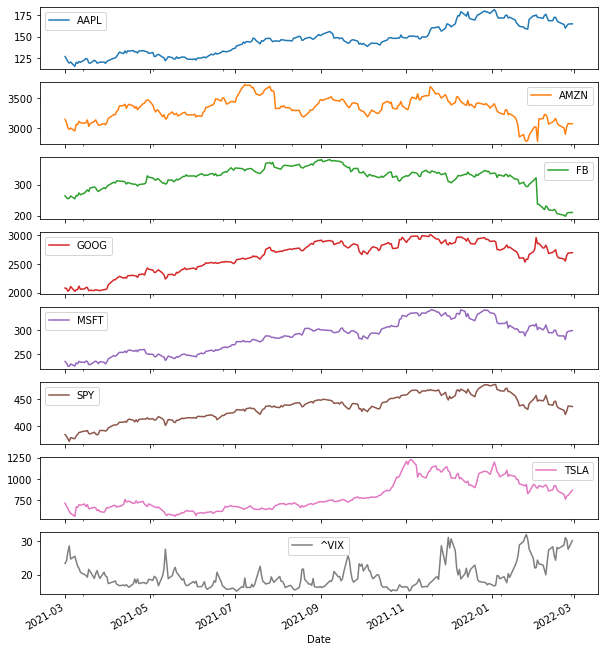

In [9]:
data.plot(figsize=(10, 12), subplots=True)

### Summary Statistics

In [10]:
data.describe().round(2)

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
count,253.00,253.00,253.00,253.00,253.00,253.00,253.00,253.00
mean,146.31,3322.02,322.43,2629.78,285.70,433.97,800.88,19.74
std,17.48,189.86,38.48,276.29,32.84,24.47,174.97,3.85
min,115.67,2776.91,198.45,2024.17,224.90,371.74,563.00,15.01
25%,131.23,3221.00,308.71,2421.28,255.89,415.51,668.06,16.95
50%,146.15,3335.55,330.25,2723.68,289.60,436.33,734.09,18.63
75%,160.04,3448.14,344.46,2853.01,307.03,451.53,931.25,21.34
max,181.78,3731.41,382.18,3014.18,342.40,477.71,1229.91,31.96


### Changes over Time

There are multiple options to calculate the changes in a time series over time, including absolute differences, percentage changes, and logarithmic (log) returns.

First, the absolute differences, for which pandas provides a special method:

In [11]:
data.diff().head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2021-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-02,-2.654236,-51.609863,-5.910004,-5.669922,-3.045197,-3.000000,-31.98999,0.75
2021-03-03,-3.041908,-89.530029,-3.589996,-49.130127,-6.259018,-5.052673,-33.23999,2.57
2021-03-04,-1.918602,-27.429932,2.230011,22.380127,-0.823303,-4.657898,-31.76001,1.90
2021-03-05,1.282372,22.889893,6.639984,59.449951,4.830658,6.838837,-23.48999,-3.91


In [12]:
data.diff().describe().round(2)

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
count,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00
mean,0.15,-0.30,-0.21,2.45,0.25,0.21,0.60,0.03
std,2.29,60.05,8.14,40.59,4.16,3.82,31.15,1.83
min,-7.03,-272.33,-85.24,-135.26,-13.44,-10.75,-139.44,-5.66
25%,-1.18,-31.52,-3.73,-16.13,-1.71,-1.86,-14.62,-0.95
50%,0.14,-0.31,-0.07,5.26,0.05,0.48,0.99,-0.14
75%,1.59,33.91,4.58,22.60,3.00,2.52,14.78,0.96
max,11.10,375.88,22.41,203.16,14.32,10.71,143.00,10.04


From a statistics point of view, absolute changes are not optimal because they are dependent on the scale of the time series data itself. Therefore, percentage changes are usually preferred. The following code derives the percentage changes or percentage returns (also: simple returns) in a financial context and visualizes their mean values per column:

In [13]:
data.pct_change().round(4).head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2021-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-02,-0.0209,-0.0164,-0.0223,-0.0027,-0.0130,-0.0078,-0.0445,0.0321
2021-03-03,-0.0245,-0.0289,-0.0139,-0.0237,-0.0270,-0.0132,-0.0484,0.1066
2021-03-04,-0.0158,-0.0091,0.0087,0.0110,-0.0036,-0.0124,-0.0486,0.0712
2021-03-05,0.0107,0.0077,0.0258,0.0290,0.0215,0.0184,-0.0378,-0.1369


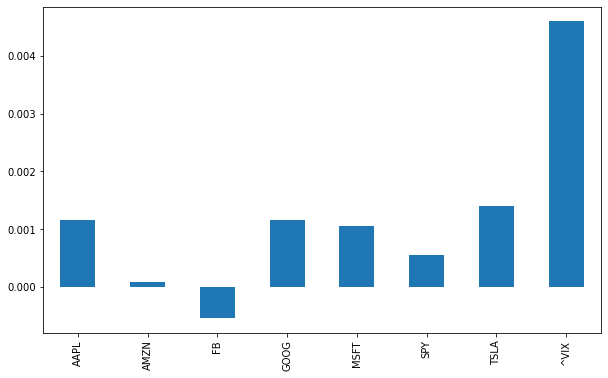

In [14]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

As an alternative to percentage returns, log returns can be used. In some scenarios, they are easier to handle and therefore often preferred in a financial context.

In [15]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2021-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-02,-0.0211,-0.0165,-0.0226,-0.0027,-0.0130,-0.0078,-0.0455,0.0316
2021-03-03,-0.0248,-0.0294,-0.0140,-0.0240,-0.0274,-0.0133,-0.0496,0.1013
2021-03-04,-0.0159,-0.0092,0.0087,0.0110,-0.0037,-0.0125,-0.0498,0.0688
2021-03-05,0.0107,0.0077,0.0254,0.0286,0.0213,0.0182,-0.0385,-0.1472


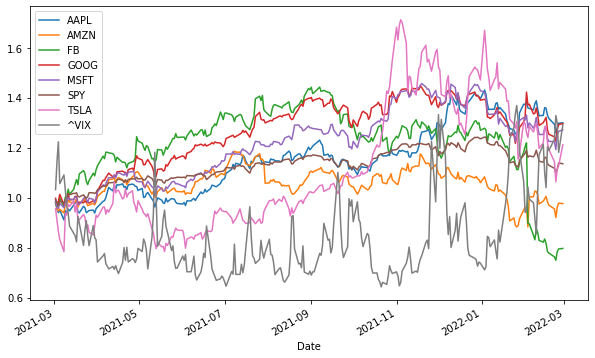

In [16]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

### Resampling

Resampling is an important operation on financial time series data. Usually this takes the form of downsampling, meaning that, for example, a tick data series is resampled to one-minute intervals or a time series with daily observations is resampled to one with weekly or monthly observations

In [17]:
data.resample('1w', label='right').last().head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2021-03-07,120.702599,3000.459961,264.279999,2108.540039,229.728760,378.583557,597.950012,24.660000
2021-03-14,120.314903,3089.489990,268.399994,2061.919922,233.845215,388.876343,693.729980,20.690001
2021-03-21,119.281052,3074.959961,290.109985,2043.199951,228.488876,385.615448,654.869995,20.950001
2021-03-28,120.493843,3052.030029,283.019989,2035.550049,234.569336,392.050995,618.710022,18.860001
2021-04-04,122.273270,3161.000000,298.660004,2137.750000,240.391907,396.635010,661.750000,17.330000


In [18]:
data.resample('1m', label='right').last().head()

,AAPL,AMZN,FB,GOOG,MSFT,SPY,TSLA,^VIX
Date,,,,,,,,
2021-03-31,121.428291,3094.080078,294.529999,2068.629883,233.865067,392.397491,667.929993,19.400000
2021-04-30,130.683304,3467.419922,325.079987,2410.120117,250.142471,413.159424,709.440002,18.610001
2021-05-31,124.084167,3223.070068,328.730011,2411.560059,248.234558,415.872253,625.219971,16.760000
2021-06-30,136.382065,3440.159912,347.709991,2506.320068,269.331726,425.199188,679.700012,15.830000
2021-07-31,145.244492,3327.590088,356.299988,2704.419922,283.260620,435.579376,687.200012,18.240000


<AxesSubplot:xlabel='Date'>

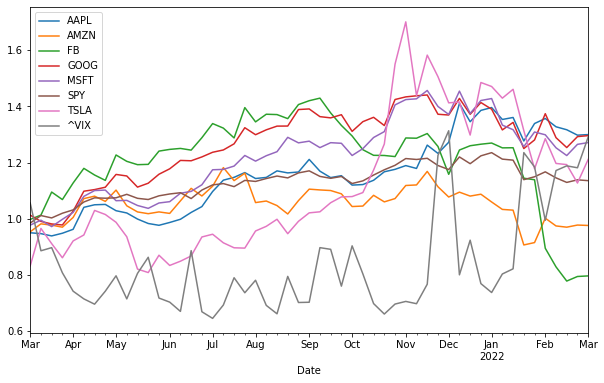

In [19]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

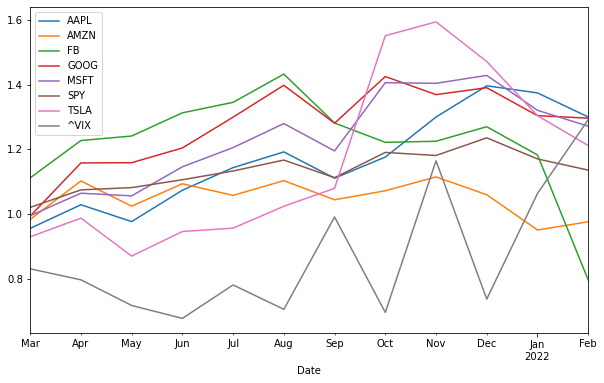

In [20]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

### Rolling Statistics

It is financial tradition to work with rolling statistics, often also called financial indicators or financial studies. Such rolling statistics are basic tools for financial chartists and technical traders, for example. This section works with a single
financial time series only:

In [21]:
sym = 'AAPL'
AAPL_data = pd.DataFrame(data[sym]).dropna()
AAPL_data.tail()

,AAPL
Date,
2022-02-22,164.320007
2022-02-23,160.070007
2022-02-24,162.740005
2022-02-25,164.850006
2022-02-28,165.119995


In [22]:
window = 10
AAPL_data['min'] = data[sym].rolling(window=window).min()
AAPL_data['mean'] = data[sym].rolling(window=window).mean()
AAPL_data['std'] = data[sym].rolling(window=window).std()
AAPL_data['median'] = data[sym].rolling(window=window).median()
AAPL_data['max'] = data[sym].rolling(window=window).max()
AAPL_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
AAPL_data.dropna().head()

,AAPL,min,mean,std,median,max,ewma
Date,,,,,,,
2021-03-12,120.314903,115.672501,120.974985,3.033738,120.538574,127.034973,120.426652
2021-03-15,123.257423,115.672501,120.597230,2.354456,120.538574,124.380737,122.549731
2021-03-16,124.828079,115.672501,120.641964,2.437128,120.538574,124.828079,124.258492
2021-03-17,124.022873,115.672501,120.910368,2.660009,120.538574,124.828079,124.081778
2021-03-18,119.817856,115.672501,120.950131,2.638141,120.538574,124.828079,120.883836


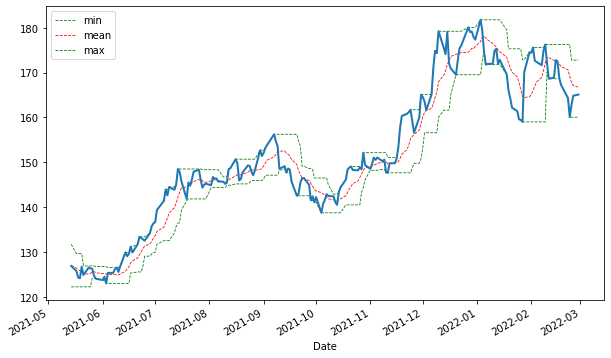

In [23]:
ax = AAPL_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

Rolling statistics are a major tool in the so-called technical analysis of stocks, as compared to the fundamental analysis which focuses, for instance, on financial reports and the strategic positions of the company whose stock is being analysed.

A decades-old trading strategy based on technical analysis is using two simple moving averages (SMAs). The idea is that the trader should go long on a stock (or financial instrument in general) when the shorter-term SMA is above the longer-term SMA and should go short when the opposite holds true. The concepts can be made precise with pandas and the capabilities of the DataFrame
object.

Rolling statistics are generally only calculated when there is enough data given the window parameter specification.

In [24]:
AAPL_data['SMA1'] = data[sym].rolling(window=20).mean()
AAPL_data['SMA2'] = data[sym].rolling(window=60).mean()
AAPL_data[[sym, 'SMA1', 'SMA2']].tail()

,AAPL,SMA1,SMA2
Date,,,
2022-02-22,164.320007,169.803793,171.021153
2022-02-23,160.070007,169.828458,171.078812
2022-02-24,162.740005,169.991119,171.123877
2022-02-25,164.850006,170.282748,171.119882
2022-02-28,165.119995,170.033085,171.129210


<AxesSubplot:xlabel='Date'>

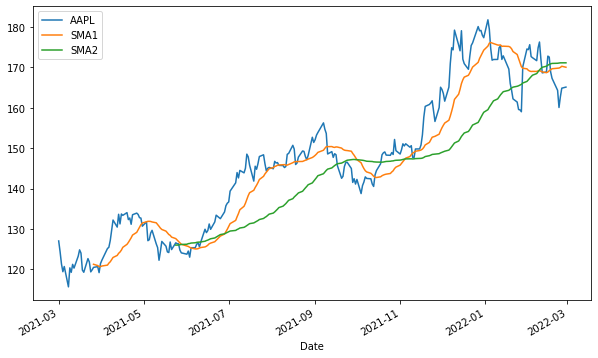

In [25]:
AAPL_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

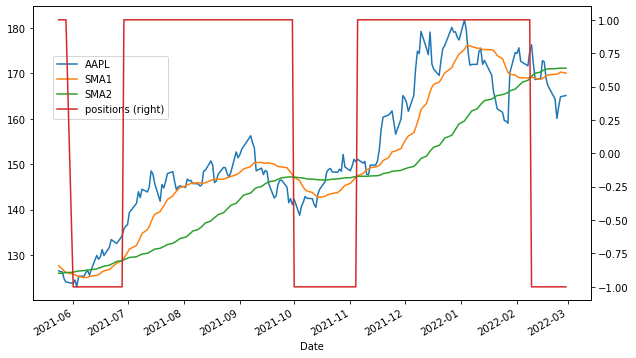

In [26]:
AAPL_data.dropna(inplace=True)
AAPL_data['positions'] = np.where(AAPL_data['SMA1'] > AAPL_data['SMA2'],1,-1)
ax = AAPL_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

### Correlation Analysis

As a further illustration of how to work with pandas and financial time series data, consider the case of the S&P 500 stock index and the VIX volatility index.

It is a stylized fact that when the S&P 500 rises, the VIX falls in general, and vice versa. This is about correlation and not causation. This section shows how to come up with some supporting statistical evidence for the stylized fact that the S&P 500 and the VIX are (highly) negatively correlated.

In [27]:
Corr_data = data[['SPY', '^VIX']].dropna()
Corr_data.tail()

,SPY,^VIX
Date,,
2022-02-22,429.570007,28.809999
2022-02-23,421.950012,31.020000
2022-02-24,428.299988,30.320000
2022-02-25,437.750000,27.590000
2022-02-28,436.630005,30.150000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

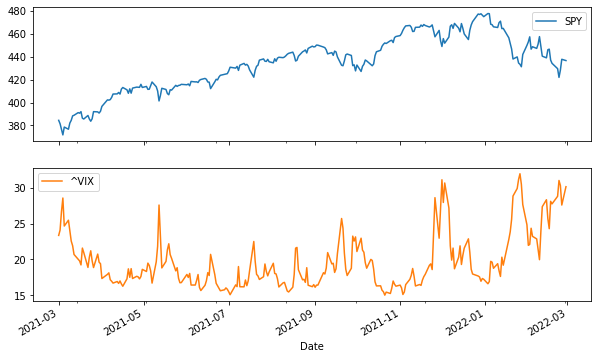

In [28]:
Corr_data.plot(subplots=True, figsize=(10, 6))

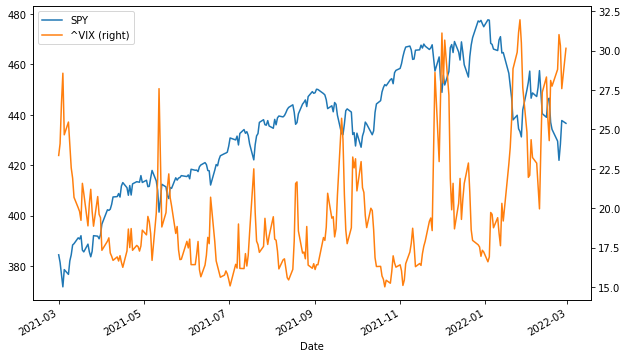

In [29]:
Corr_data.loc['2020-01-01':].plot(secondary_y='^VIX', figsize=(10, 6));

#### Logarithmic Returns

As pointed out earlier, statistical analysis in general relies on returns instead of absolute changes or even absolute values. Therefore, we’ll calculate log returns first before any further analysis takes place.

In [30]:
sprets = np.log(Corr_data / Corr_data.shift(1))
sprets.head()

,SPY,^VIX
Date,,
2021-03-01,NaN,NaN
2021-03-02,-0.007834,0.031615
2021-03-03,-0.013334,0.101327
2021-03-04,-0.012452,0.068818
2021-03-05,0.018229,-0.147175


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

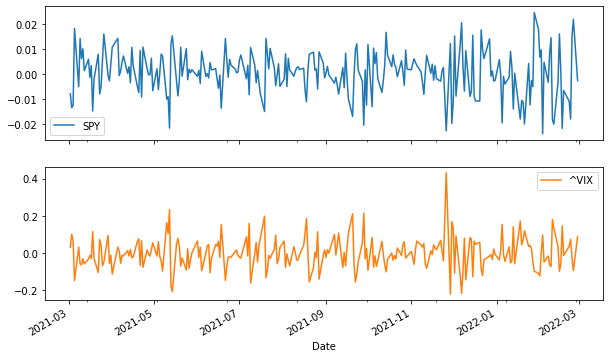

In [31]:
sprets.dropna(inplace=True)
sprets.plot(subplots=True, figsize=(10, 6))

In such a context, the pandas scatter_matrix() plotting function comes in handy for visualizations. It plots the log returns of the two series against each other, and one can add either a histogram or a kernel density estimator (KDE) on the diagonal:

array([[<AxesSubplot:xlabel='SPY', ylabel='SPY'>,
        <AxesSubplot:xlabel='^VIX', ylabel='SPY'>],
       [<AxesSubplot:xlabel='SPY', ylabel='^VIX'>,
        <AxesSubplot:xlabel='^VIX', ylabel='^VIX'>]], dtype=object)

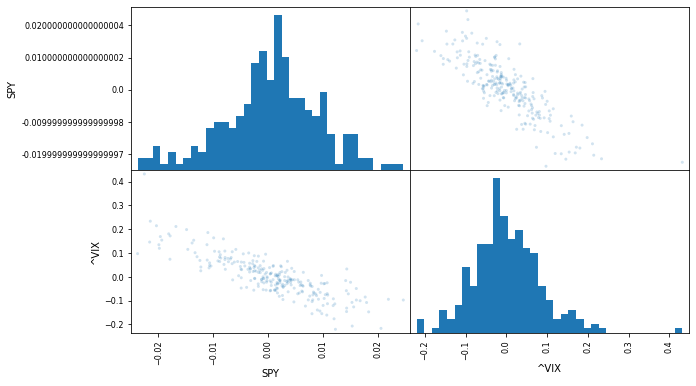

In [32]:
pd.plotting.scatter_matrix(sprets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

#### OLS Regression

With all these preparations, an ordinary least-squares (OLS) regression analysis is convenient to implement.

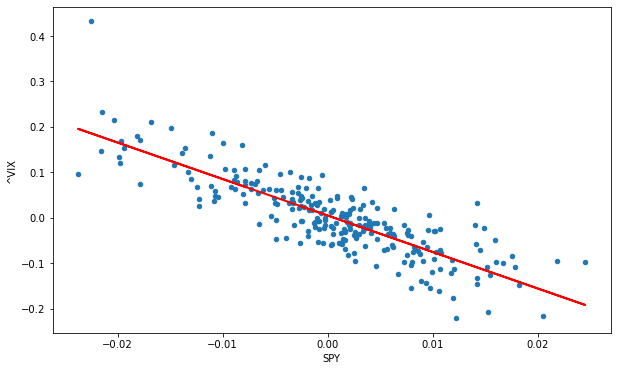

In [33]:
reg = np.polyfit(sprets['SPY'], sprets['^VIX'], deg=1)
ax = sprets.plot(kind='scatter', x='SPY', y='^VIX', figsize=(10, 6))
ax.plot(sprets['SPY'], np.polyval(reg, sprets['SPY']), 'r', lw=2);

#### Correlation

Finally, we consider correlation measures directly. Two such measures are considered: a static one taking into account the complete data set and a rolling one showing the correlation for a fixed window over time.

In [34]:
sprets.corr()

,SPY,^VIX
SPY,1.000000,-0.839677
^VIX,-0.839677,1.000000


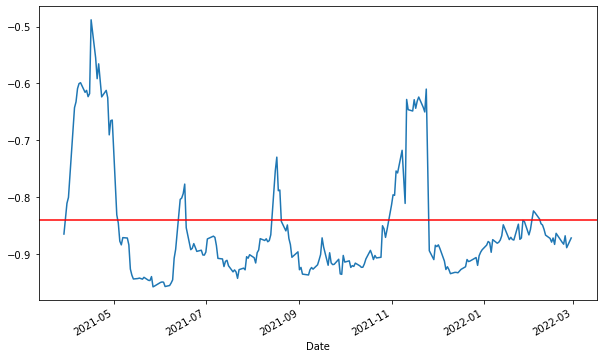

In [35]:
ax = sprets['SPY'].rolling(window=20).corr(sprets['^VIX']).plot(figsize=(10, 6)) 
ax.axhline(sprets.corr().iloc[0, 1], c='r');